# Predictive Maintenance and Condition-Based Monitoring (CBM) for Maritime Drive Systems Using Machine Learning Techniques

## *Problem Statement*

This dataset records operational performance metrics of a ship's gas turbine propulsion system. Each row represents a set of measurements taken under specific conditions, likely at different times or operational states. The parameters captured include various torque measurements, rates of revolutions, temperatures, pressures, fuel flow, and state coefficients. These metrics are crucial for monitoring and analyzing the propulsion system's performance, efficiency, and maintenance needs.
The data can be used for predictive maintenance, performance optimization, and anomaly detection. By analyzing the relationship between these parameters, one can identify patterns that indicate potential issues or areas for improvement in the propulsion system.


## ***1.Know Your Data***

Lever position(measure in RPM-Low to High): Position of the ship's lever (range: 1.138 to 9.3).(Indicates throttle speed).

Ship speed (v): Speed of the ship, likely in knots (range: 3 to 27).

Gas Turbine (GT) shaft torque (GTT): Torque on the gas turbine shaft in kN m (range: 289.964 to 72763.329).

GT rate of revolutions (GTn): Revolutions per minute (rpm) of the gas turbine (range: 1349.489 to 3560.395).

Gas Generator rate of revolutions (GGn): Revolutions per minute (rpm) of the gas generator (range: 6677.38 to 9778.528).

Starboard Propeller Torque (Ts): Torque on the starboard propeller in kN (range: 7.584 to 644.905).

Port Propeller Torque (Tp): Torque on the port propeller in kN (range: 7.584 to 644.905).

High Pressure (HP) Turbine exit temperature (T48): Temperature at the exit of the high-pressure turbine in Celsius (range: 464.006 to 115.797).

GT Compressor inlet air temperature (T1): Temperature of inlet air to the gas turbine compressor in Celsius (constant at 288).

GT Compressor outlet air temperature (T2): Temperature of outlet air from the gas turbine compressor in Celsius (range: 550.563 to 789.094).

HP Turbine exit pressure (P48): Pressure at the exit of the high-pressure turbine in bar (range: 1.096 to 4.498).

GT Compressor inlet air pressure (P1): Pressure of inlet air to the gas turbine compressor in bar(constant at 0.998). 

GT Compressor outlet air pressure (P2): Pressure of outlet air from the gas turbine compressor in the bar (range: 5.947 to 22.811).

GT exhaust gas pressure (Pexh): Pressure of exhaust gas from the gas turbine in the bar (range: 1.019 to 1.049).

Turbine Injection Control (TIC): Control parameter for turbine injection in percentage (range: 3.879 to 92.556).

Fuel flow (mf): Rate of fuel flow into the gas turbine in kg/s (range: 0.079 to 1.832).

GT Turbine decay state coefficient: Coefficient related to the decay state of the gas turbine turbine (range: 0.975 to 1). (Note- usually a drop of 5-10% in efficiency might be considered critical for gas turbines




### Importing Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from numpy import math

### Dataset Loading

In [2]:
# Load Datasets
data = pd.read_csv("C:/Users/91628/July - Project/Conditional_Base_Monitoring in Marine_System.csv") 

### Dataset First view

In [3]:
# Dataset First view
data.head()

,Lever position,Ship speed (v),Gas Turbine (GT) shaft torque (GTT) [kN m],GT rate of revolutions (GTn) [rpm],Gas Generator rate of revolutions (GGn) [rpm],Starboard Propeller Torque (Ts) [kN],Port Propeller Torque (Tp) [kN],Hight Pressure (HP) Turbine exit temperature (T48) [C],GT Compressor inlet air temperature (T1) [C],GT Compressor outlet air temperature (T2) [C],HP Turbine exit pressure (P48) [bar],GT Compressor inlet air pressure (P1) [bar],GT Compressor outlet air pressure (P2) [bar],GT exhaust gas pressure (Pexh) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s],GT Turbine decay state coefficient
0,5.14,15,21640.162,1924.358,8516.691,175.324,175.324,706.702,288,640.873,2.072,0.998,10.916,1.026,24.96,0.494,1
1,9.3,27,72776.229,3560.412,9759.837,645.137,645.137,1060.156,288,774.302,4.511,0.998,22.426,1.051,87.741,1.737,0.997
2,8.206,24,50994.673,3087.535,9313.854,438.11,438.11,927.728,288,734.474,3.577,0.998,18.412,1.041,60.546,1.199,0.988
3,5.14,15,21626.805,1924.329,8472.097,175.221,175.221,695.477,288,633.124,2.086,0.998,11.074,1.027,24.549,0.486,0.991
4,5.14,15,21636.43,1924.313,8494.777,NaN,NaN,731.494,288,645.642,2.078,0.998,11.197,1.026,26.373,0.522,0.975


### Dataset Last view

In [4]:
# Dataset Last view
data.tail()

,Lever position,Ship speed (v),Gas Turbine (GT) shaft torque (GTT) [kN m],GT rate of revolutions (GTn) [rpm],Gas Generator rate of revolutions (GGn) [rpm],Starboard Propeller Torque (Ts) [kN],Port Propeller Torque (Tp) [kN],Hight Pressure (HP) Turbine exit temperature (T48) [C],GT Compressor inlet air temperature (T1) [C],GT Compressor outlet air temperature (T2) [C],HP Turbine exit pressure (P48) [bar],GT Compressor inlet air pressure (P1) [bar],GT Compressor outlet air pressure (P2) [bar],GT exhaust gas pressure (Pexh) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s],GT Turbine decay state coefficient
12429,9.3,27,72774.292,3560.407,9753.571,644.796,644.796,1055.58,288,772.682,4.519,0.998,22.485,1.051,87.46,1.731,0.996
12430,6.175,18,29796.511,2307.266,8840.516,246.316,246.316,780.537,288,671.845,2.497,0.998,13.144,1.03,34.498,0.683,0.991
12431,5.14,15,21625.687,1924.321,8466.713,175.249,175.249,699.706,288,633.775,2.088,0.998,11.132,1.027,24.802,0.491,0.986
12432,4.161,12,14718.853,1547.451,7728.002,113.727,113.727,631.711,288,603.073,1.663,0.998,8.927,1.023,16.827,0.333,0.988
12433,2.088,6,3217.569,1350.216,6786.171,23.347,23.347,525.82,288,561.995,1.209,0.998,6.558,1.019,18.305,0.165,0.98


### Shape of the Dataset

In [5]:
# Sales data shape, rows and columns count
print(f'Shape of the dataset is:{data.shape}')
print(f'Our dataset contains : {data.index.value_counts().sum()} Rows')
print(f'Our dataset contains : {data.columns.value_counts().sum()} Columns')

Shape of the dataset is:(12434, 17)
Our dataset contains : 12434 Rows
Our dataset contains : 17 Columns


### Dataset information

In [6]:
# Data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12434 entries, 0 to 12433
Data columns (total 17 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   Lever position                                            12387 non-null  object
 1   Ship speed (v)                                            12374 non-null  object
 2   Gas Turbine (GT) shaft torque (GTT) [kN m]                12390 non-null  object
 3   GT rate of revolutions (GTn) [rpm]                        12383 non-null  object
 4   Gas Generator rate of revolutions (GGn) [rpm]             12389 non-null  object
 5   Starboard Propeller Torque (Ts) [kN]                      12385 non-null  object
 6   Port Propeller Torque (Tp) [kN]                           12377 non-null  object
 7   Hight Pressure (HP) Turbine exit temperature (T48) [C]    12371 non-null  object
 8   GT Compressor inlet air te

### Datatype conversion

In [7]:
# List of columns to convert to numeric types
columns_to_convert = [
    'Lever position ','Ship speed (v) ','Gas Turbine (GT) shaft torque (GTT) [kN m]\xa0 ',
          'GT rate of revolutions (GTn) [rpm]\xa0 ','Gas Generator rate of revolutions (GGn) [rpm]\xa0 ','Starboard Propeller Torque (Ts) [kN]\xa0 ',
          'Port Propeller Torque (Tp) [kN]\xa0 ','Hight Pressure (HP) Turbine exit temperature (T48) [C]\xa0 ','GT Compressor inlet air temperature (T1) [C]\xa0 ',
          'GT Compressor outlet air temperature (T2) [C]\xa0 ','HP Turbine exit pressure (P48) [bar]\xa0 ','GT Compressor inlet air pressure (P1) [bar]\xa0 ','GT Compressor outlet air pressure (P2) [bar]\xa0 ',
          'GT exhaust gas pressure (Pexh) [bar]\xa0 ','Turbine Injecton Control (TIC) [%]\xa0 ','Fuel flow (mf) [kg/s]\xa0 ','GT Turbine decay state coefficient ']

# Convert columns to numeric types
for column in columns_to_convert:
    data[column] = pd.to_numeric(data[column], errors='coerce')

 All the columns of the dataset is in Object Datatype so i have converted object data type to integer using pd.to_numeric

### Null Value Treatment

In [8]:
data.isnull().sum().sort_values(ascending=False)

Hight Pressure (HP) Turbine exit temperature (T48) [C]      87
Turbine Injecton Control (TIC) [%]                          85
GT Compressor inlet air pressure (P1) [bar]                 83
Ship speed (v)                                              83
GT Compressor inlet air temperature (T1) [C]                81
GT exhaust gas pressure (Pexh) [bar]                        80
Port Propeller Torque (Tp) [kN]                             80
GT Turbine decay state coefficient                          76
GT rate of revolutions (GTn) [rpm]                          76
Starboard Propeller Torque (Ts) [kN]                        74
HP Turbine exit pressure (P48) [bar]                        72
GT Compressor outlet air temperature (T2) [C]               71
Lever position                                              71
Gas Generator rate of revolutions (GGn) [rpm]               68
Gas Turbine (GT) shaft torque (GTT) [kN m]                  68
GT Compressor outlet air pressure (P2) [bar]           

In [9]:
# Handle missing values
data.fillna(method='ffill', inplace=True)

In [10]:
data.isnull().sum()

Lever position                                              0
Ship speed (v)                                              0
Gas Turbine (GT) shaft torque (GTT) [kN m]                  0
GT rate of revolutions (GTn) [rpm]                          0
Gas Generator rate of revolutions (GGn) [rpm]               0
Starboard Propeller Torque (Ts) [kN]                        0
Port Propeller Torque (Tp) [kN]                             0
Hight Pressure (HP) Turbine exit temperature (T48) [C]      0
GT Compressor inlet air temperature (T1) [C]                0
GT Compressor outlet air temperature (T2) [C]               0
HP Turbine exit pressure (P48) [bar]                        0
GT Compressor inlet air pressure (P1) [bar]                 0
GT Compressor outlet air pressure (P2) [bar]                0
GT exhaust gas pressure (Pexh) [bar]                        0
Turbine Injecton Control (TIC) [%]                          0
Fuel flow (mf) [kg/s]                                       0
GT Turbi

In [11]:
data.columns

Index(['Lever position ', 'Ship speed (v) ',
       'Gas Turbine (GT) shaft torque (GTT) [kN m]  ',
       'GT rate of revolutions (GTn) [rpm]  ',
       'Gas Generator rate of revolutions (GGn) [rpm]  ',
       'Starboard Propeller Torque (Ts) [kN]  ',
       'Port Propeller Torque (Tp) [kN]  ',
       'Hight Pressure (HP) Turbine exit temperature (T48) [C]  ',
       'GT Compressor inlet air temperature (T1) [C]  ',
       'GT Compressor outlet air temperature (T2) [C]  ',
       'HP Turbine exit pressure (P48) [bar]  ',
       'GT Compressor inlet air pressure (P1) [bar]  ',
       'GT Compressor outlet air pressure (P2) [bar]  ',
       'GT exhaust gas pressure (Pexh) [bar]  ',
       'Turbine Injecton Control (TIC) [%]  ', 'Fuel flow (mf) [kg/s]  ',
       'GT Turbine decay state coefficient '],
      dtype='object')

In [12]:
data.describe()

,Lever position,Ship speed (v),Gas Turbine (GT) shaft torque (GTT) [kN m],GT rate of revolutions (GTn) [rpm],Gas Generator rate of revolutions (GGn) [rpm],Starboard Propeller Torque (Ts) [kN],Port Propeller Torque (Tp) [kN],Hight Pressure (HP) Turbine exit temperature (T48) [C],GT Compressor inlet air temperature (T1) [C],GT Compressor outlet air temperature (T2) [C],HP Turbine exit pressure (P48) [bar],GT Compressor inlet air pressure (P1) [bar],GT Compressor outlet air pressure (P2) [bar],GT exhaust gas pressure (Pexh) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s],GT Turbine decay state coefficient
count,12434.000000,12434.000000,12434.000000,12434.000000,12434.000000,12434.000000,12434.000000,12434.000000,12434.0,12434.000000,12434.000000,1.243400e+04,12434.000000,12434.000000,12434.000000,12434.000000,12434.000000
mean,5.097656,14.794193,26657.597111,2115.289779,8171.686878,222.065221,222.385998,731.548860,288.0,644.533699,2.323317,9.980000e-01,12.146406,1.029194,33.019294,0.649371,0.987073
std,2.620847,7.734642,22022.599266,770.054358,1089.872578,199.268618,199.352693,172.785066,0.0,72.306701,1.078391,2.595806e-13,5.308763,0.010327,25.653482,0.503085,0.007711
min,1.138000,3.000000,253.547000,1307.675000,6589.002000,5.304000,5.304000,442.364000,288.0,540.442000,1.093000,9.980000e-01,5.828000,1.019000,0.000000,0.068000,0.975000
25%,3.144000,9.000000,8375.537250,1386.756000,7051.424750,60.314000,60.314000,590.169250,288.0,578.212750,1.388000,9.980000e-01,7.437000,1.020000,12.986750,0.246000,0.980000
50%,5.140000,15.000000,21628.987500,1924.320000,8477.203000,175.256000,175.256500,703.515000,288.0,635.899000,2.080000,9.980000e-01,11.061000,1.026000,25.136500,0.493500,0.987000
75%,7.148000,21.000000,38998.438000,2678.077000,9130.536750,332.331500,332.335000,830.829250,288.0,692.708000,2.979000,9.980000e-01,15.619750,1.036000,44.347750,0.878000,0.994000
max,9.300000,27.000000,72784.872000,3560.741000,9797.103000,645.249000,645.249000,1115.797000,288.0,789.094000,4.560000,9.980000e-01,23.140000,1.052000,92.556000,1.832000,1.000000


Since from .describe() function all the values in column ['GT Compressor inlet air temperature (T1) [C]'] & ['GT Compressor inlet air pressure (P1) [bar]'] are same we use .drop() function to drop those two columns as the output labels doesn't depend on these two input features as they remain constant

In [13]:
# Using .drop() function of pandas to drop out the two columns and we will call the dataset as 'nv'
nv = data.drop(['GT Compressor inlet air temperature (T1) [C]\xa0 ','GT Compressor inlet air pressure (P1) [bar]\xa0 '],axis=1)

In [14]:
data1 = nv.rename(columns={'Lever position ':'Lever position','Ship speed (v) ':'Ship speed (v)','Gas Turbine (GT) shaft torque (GTT) [kN m]\xa0 ':'GTT',
          'GT rate of revolutions (GTn) [rpm]\xa0 ':'GTn','Gas Generator rate of revolutions (GGn) [rpm]\xa0 ':'GGn','Starboard Propeller Torque (Ts) [kN]\xa0 ':'Ts',
          'Port Propeller Torque (Tp) [kN]\xa0 ':'Tp','Hight Pressure (HP) Turbine exit temperature (T48) [C]\xa0 ':'HP','GT Compressor outlet air temperature (T2) [C]\xa0 ':'T2',
          'HP Turbine exit pressure (P48) [bar]\xa0 ':'P48','GT Compressor outlet air pressure (P2) [bar]\xa0 ':'P2','GT exhaust gas pressure (Pexh) [bar]\xa0 ':'Pexh',
          'Turbine Injecton Control (TIC) [%]\xa0 ':'TIC','Fuel flow (mf) [kg/s]\xa0 ':'mf','GT Turbine decay state coefficient ':'Turbine DSC'})

In [15]:
data1.duplicated().any()

True

In [16]:
# Remove duplicate rows
data2=data1.drop_duplicates()
data2

,Lever position,Ship speed (v),GTT,GTn,GGn,Ts,Tp,HP,T2,P48,P2,Pexh,TIC,mf,Turbine DSC
0,5.140,15.0,21640.162,1924.358,8516.691,175.324,175.324,706.702,640.873,2.072,10.916,1.026,24.960,0.494,1.000
1,9.300,27.0,72776.229,3560.412,9759.837,645.137,645.137,1060.156,774.302,4.511,22.426,1.051,87.741,1.737,0.997
2,8.206,24.0,50994.673,3087.535,9313.854,438.110,438.110,927.728,734.474,3.577,18.412,1.041,60.546,1.199,0.988
3,5.140,15.0,21626.805,1924.329,8472.097,175.221,175.221,695.477,633.124,2.086,11.074,1.027,24.549,0.486,0.991
4,5.140,15.0,21636.430,1924.313,8494.777,175.221,175.221,731.494,645.642,2.078,11.197,1.026,26.373,0.522,0.975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12429,9.300,27.0,72774.292,3560.407,9753.571,644.796,644.796,1055.580,772.682,4.519,22.485,1.051,87.460,1.731,0.996
12430,6.175,18.0,29796.511,2307.266,8840.516,246.316,246.316,780.537,671.845,2.497,13.144,1.030,34.498,0.683,0.991
12431,5.140,15.0,21625.687,1924.321,8466.713,175.249,175.249,699.706,633.775,2.088,11.132,1.027,24.802,0.491,0.986
12432,4.161,12.0,14718.853,1547.451,7728.002,113.727,113.727,631.711,603.073,1.663,8.927,1.023,16.827,0.333,0.988


In [17]:
print(data2.apply(lambda col: col.nunique()))

Lever position        9
Ship speed (v)        9
GTT               11432
GTn                3888
GGn               11834
Ts                 4286
Tp                 4286
HP                11772
T2                11506
P48                 524
P2                 4209
Pexh                 19
TIC                8496
mf                  696
Turbine DSC          26
dtype: int64


In [18]:
data2.shape

(12403, 15)

### Dealing With Outliers

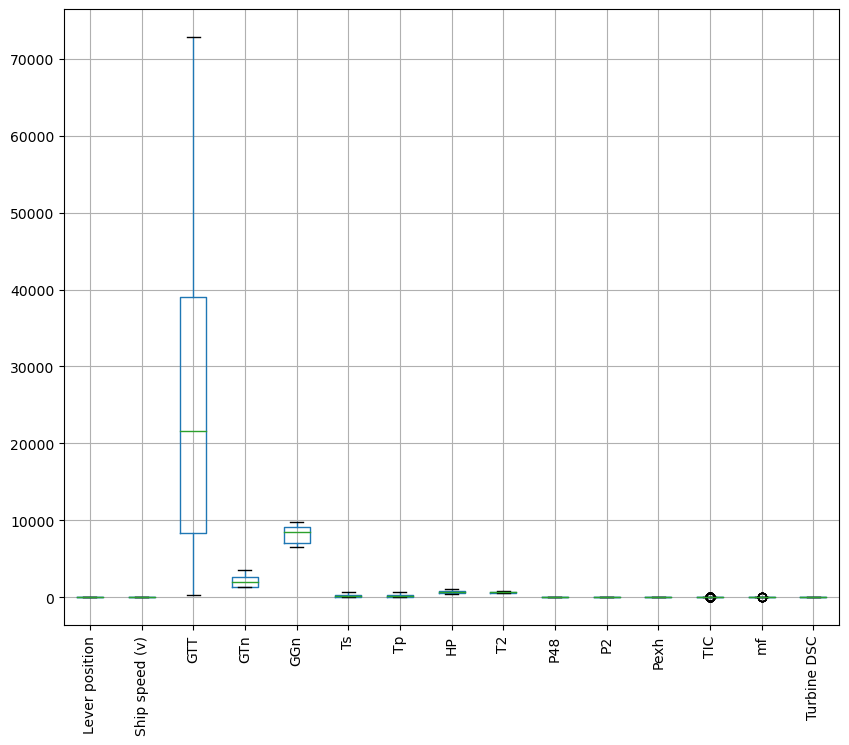

In [19]:
# Deal with outliers
plt.figure(figsize=(10,8))
data2.boxplot()
plt.xticks(rotation='vertical')
plt.show()

# ***Data Visualization : Relationship between the variables***

## Exploratory Data Analysis

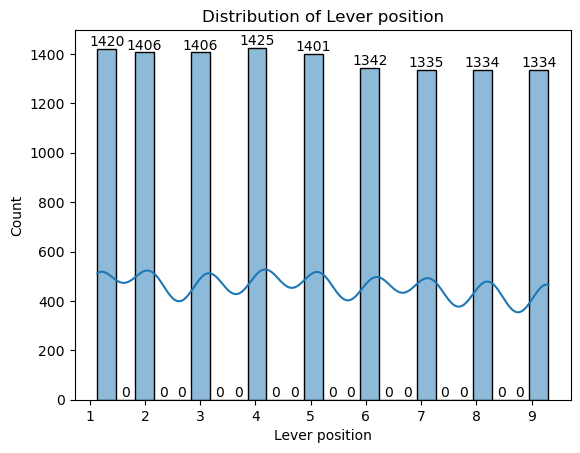

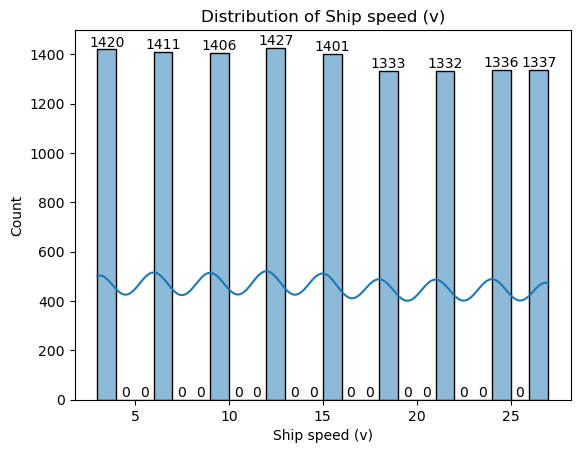

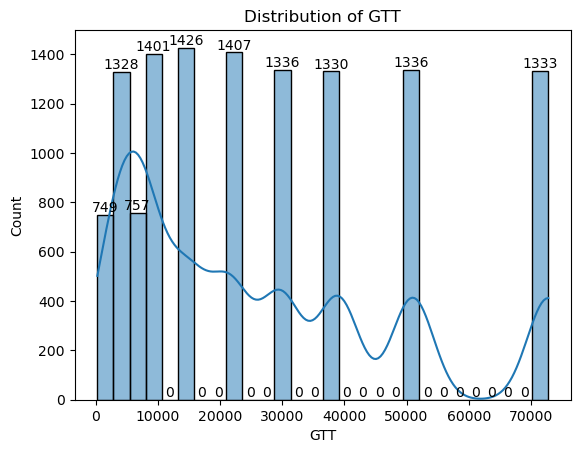

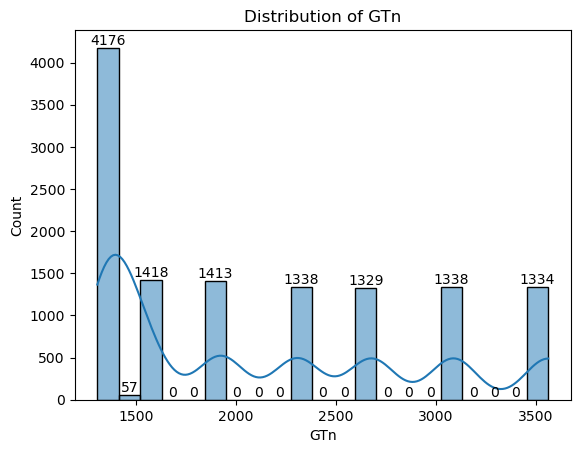

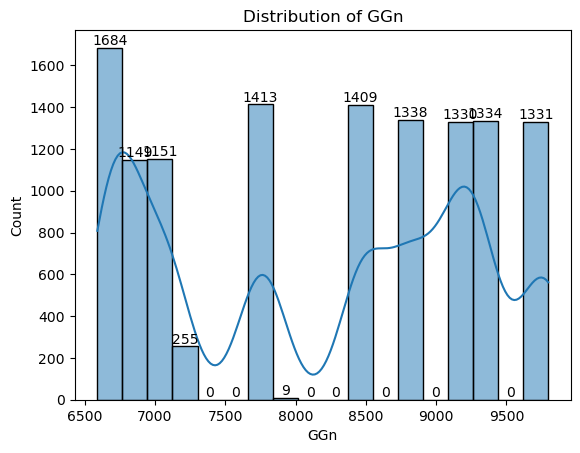

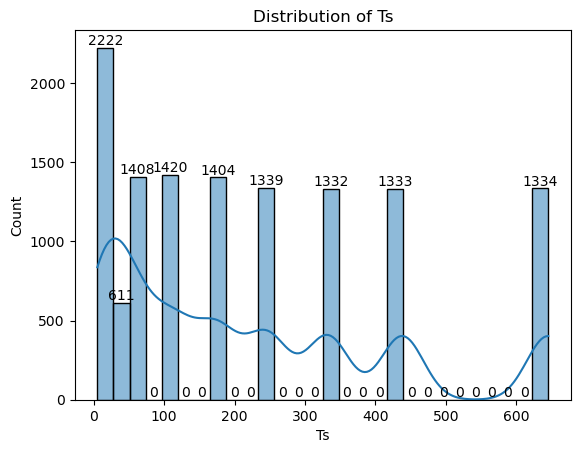

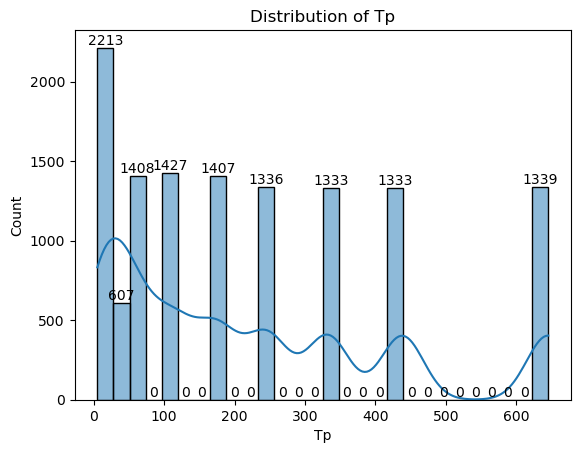

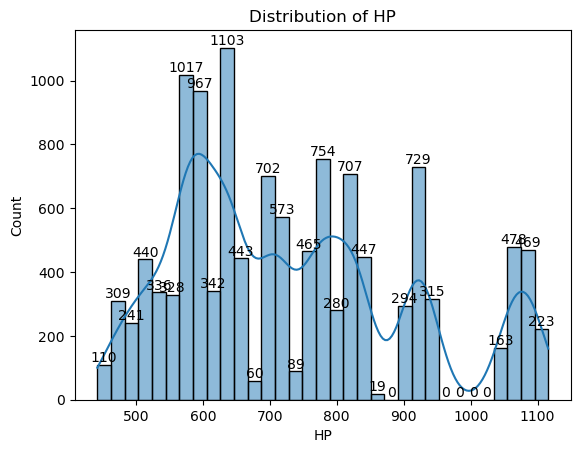

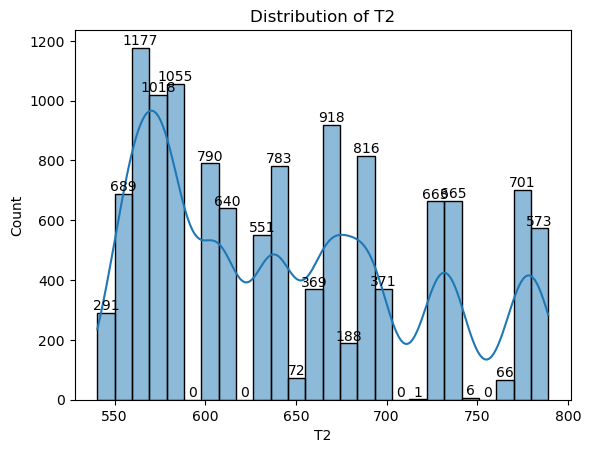

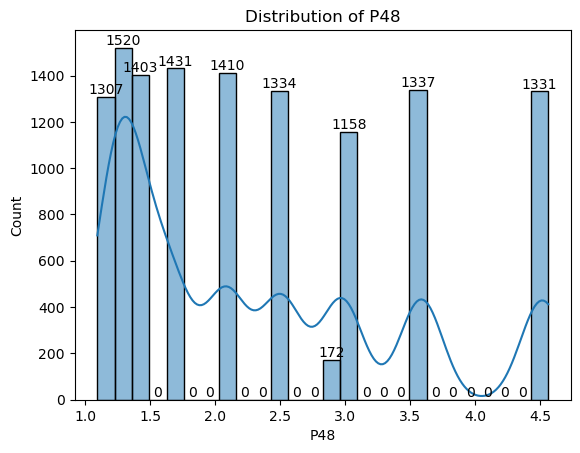

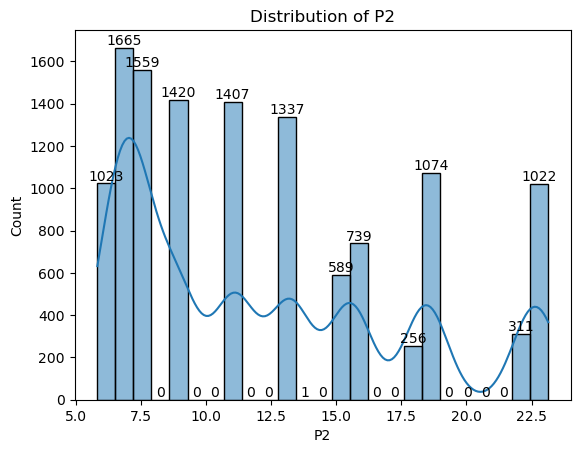

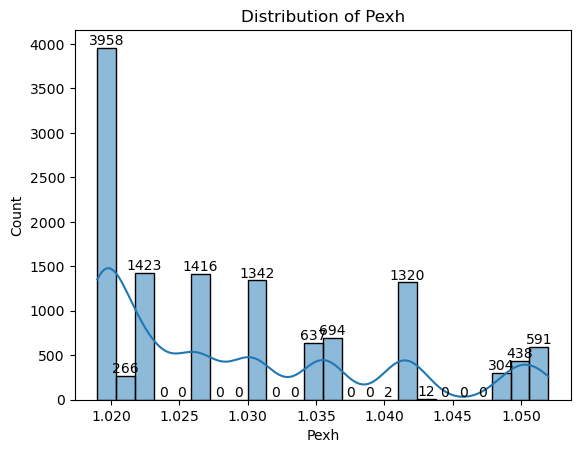

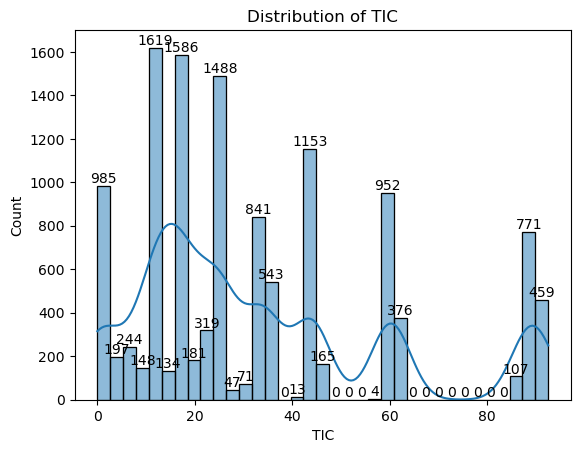

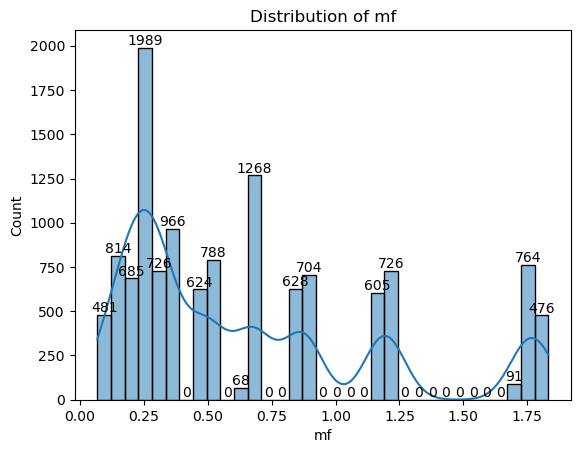

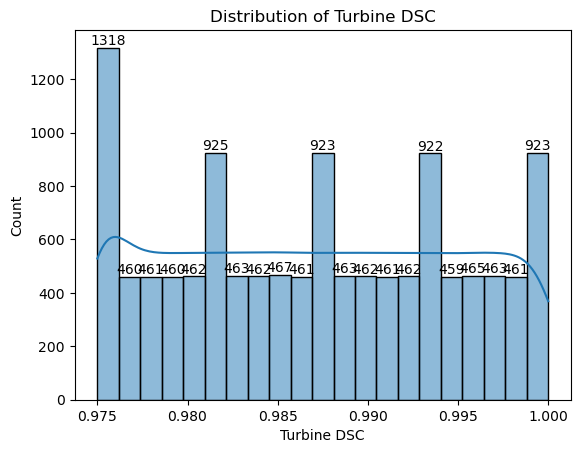

<Figure size 640x480 with 0 Axes>

In [20]:
# Distribution Plots
for column in data2.columns:
    tx = sns.histplot(data2[column], kde=True)
    plt.title(f'Distribution of {column}')
    for i in tx.containers:
        tx.bar_label(i,)
    plt.show()
    plt.tight_layout()

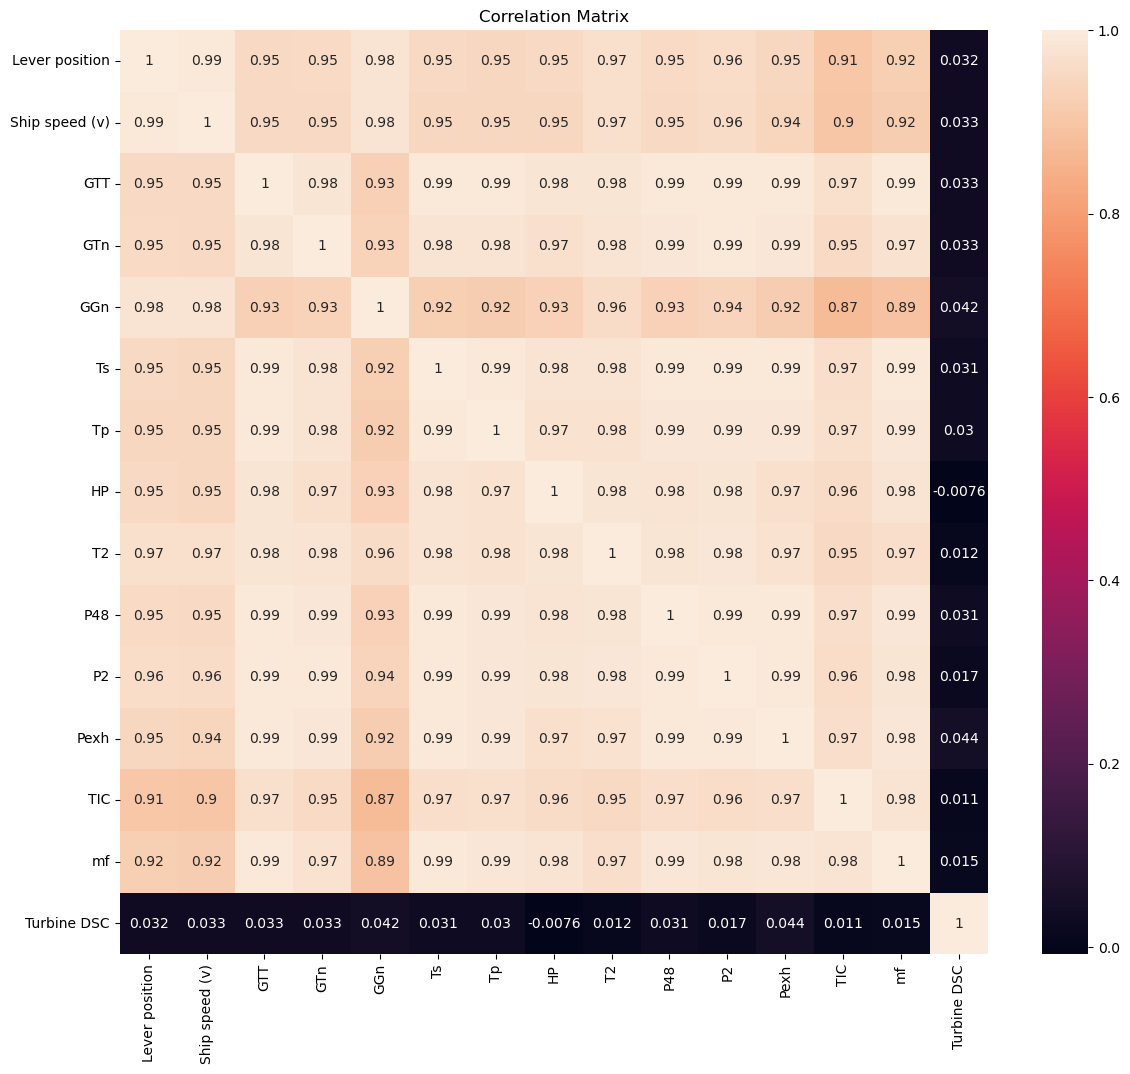

In [21]:
# Correlation matrix
plt.figure(figsize=(14, 12))
sns.heatmap(data2.corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()

* There exists a very strong positive correlation among all the input features
* As you can see most of the input features have a correlation value of 0.97 and above
* This means that when an input feature increases by one unit the correlated feature corresponding to that input feature also increases by one unit
* These input correlations will be useful in finetuning the base model in the future in the form of interaction terms
* Both the output labels have almost no correlation with any of the input features

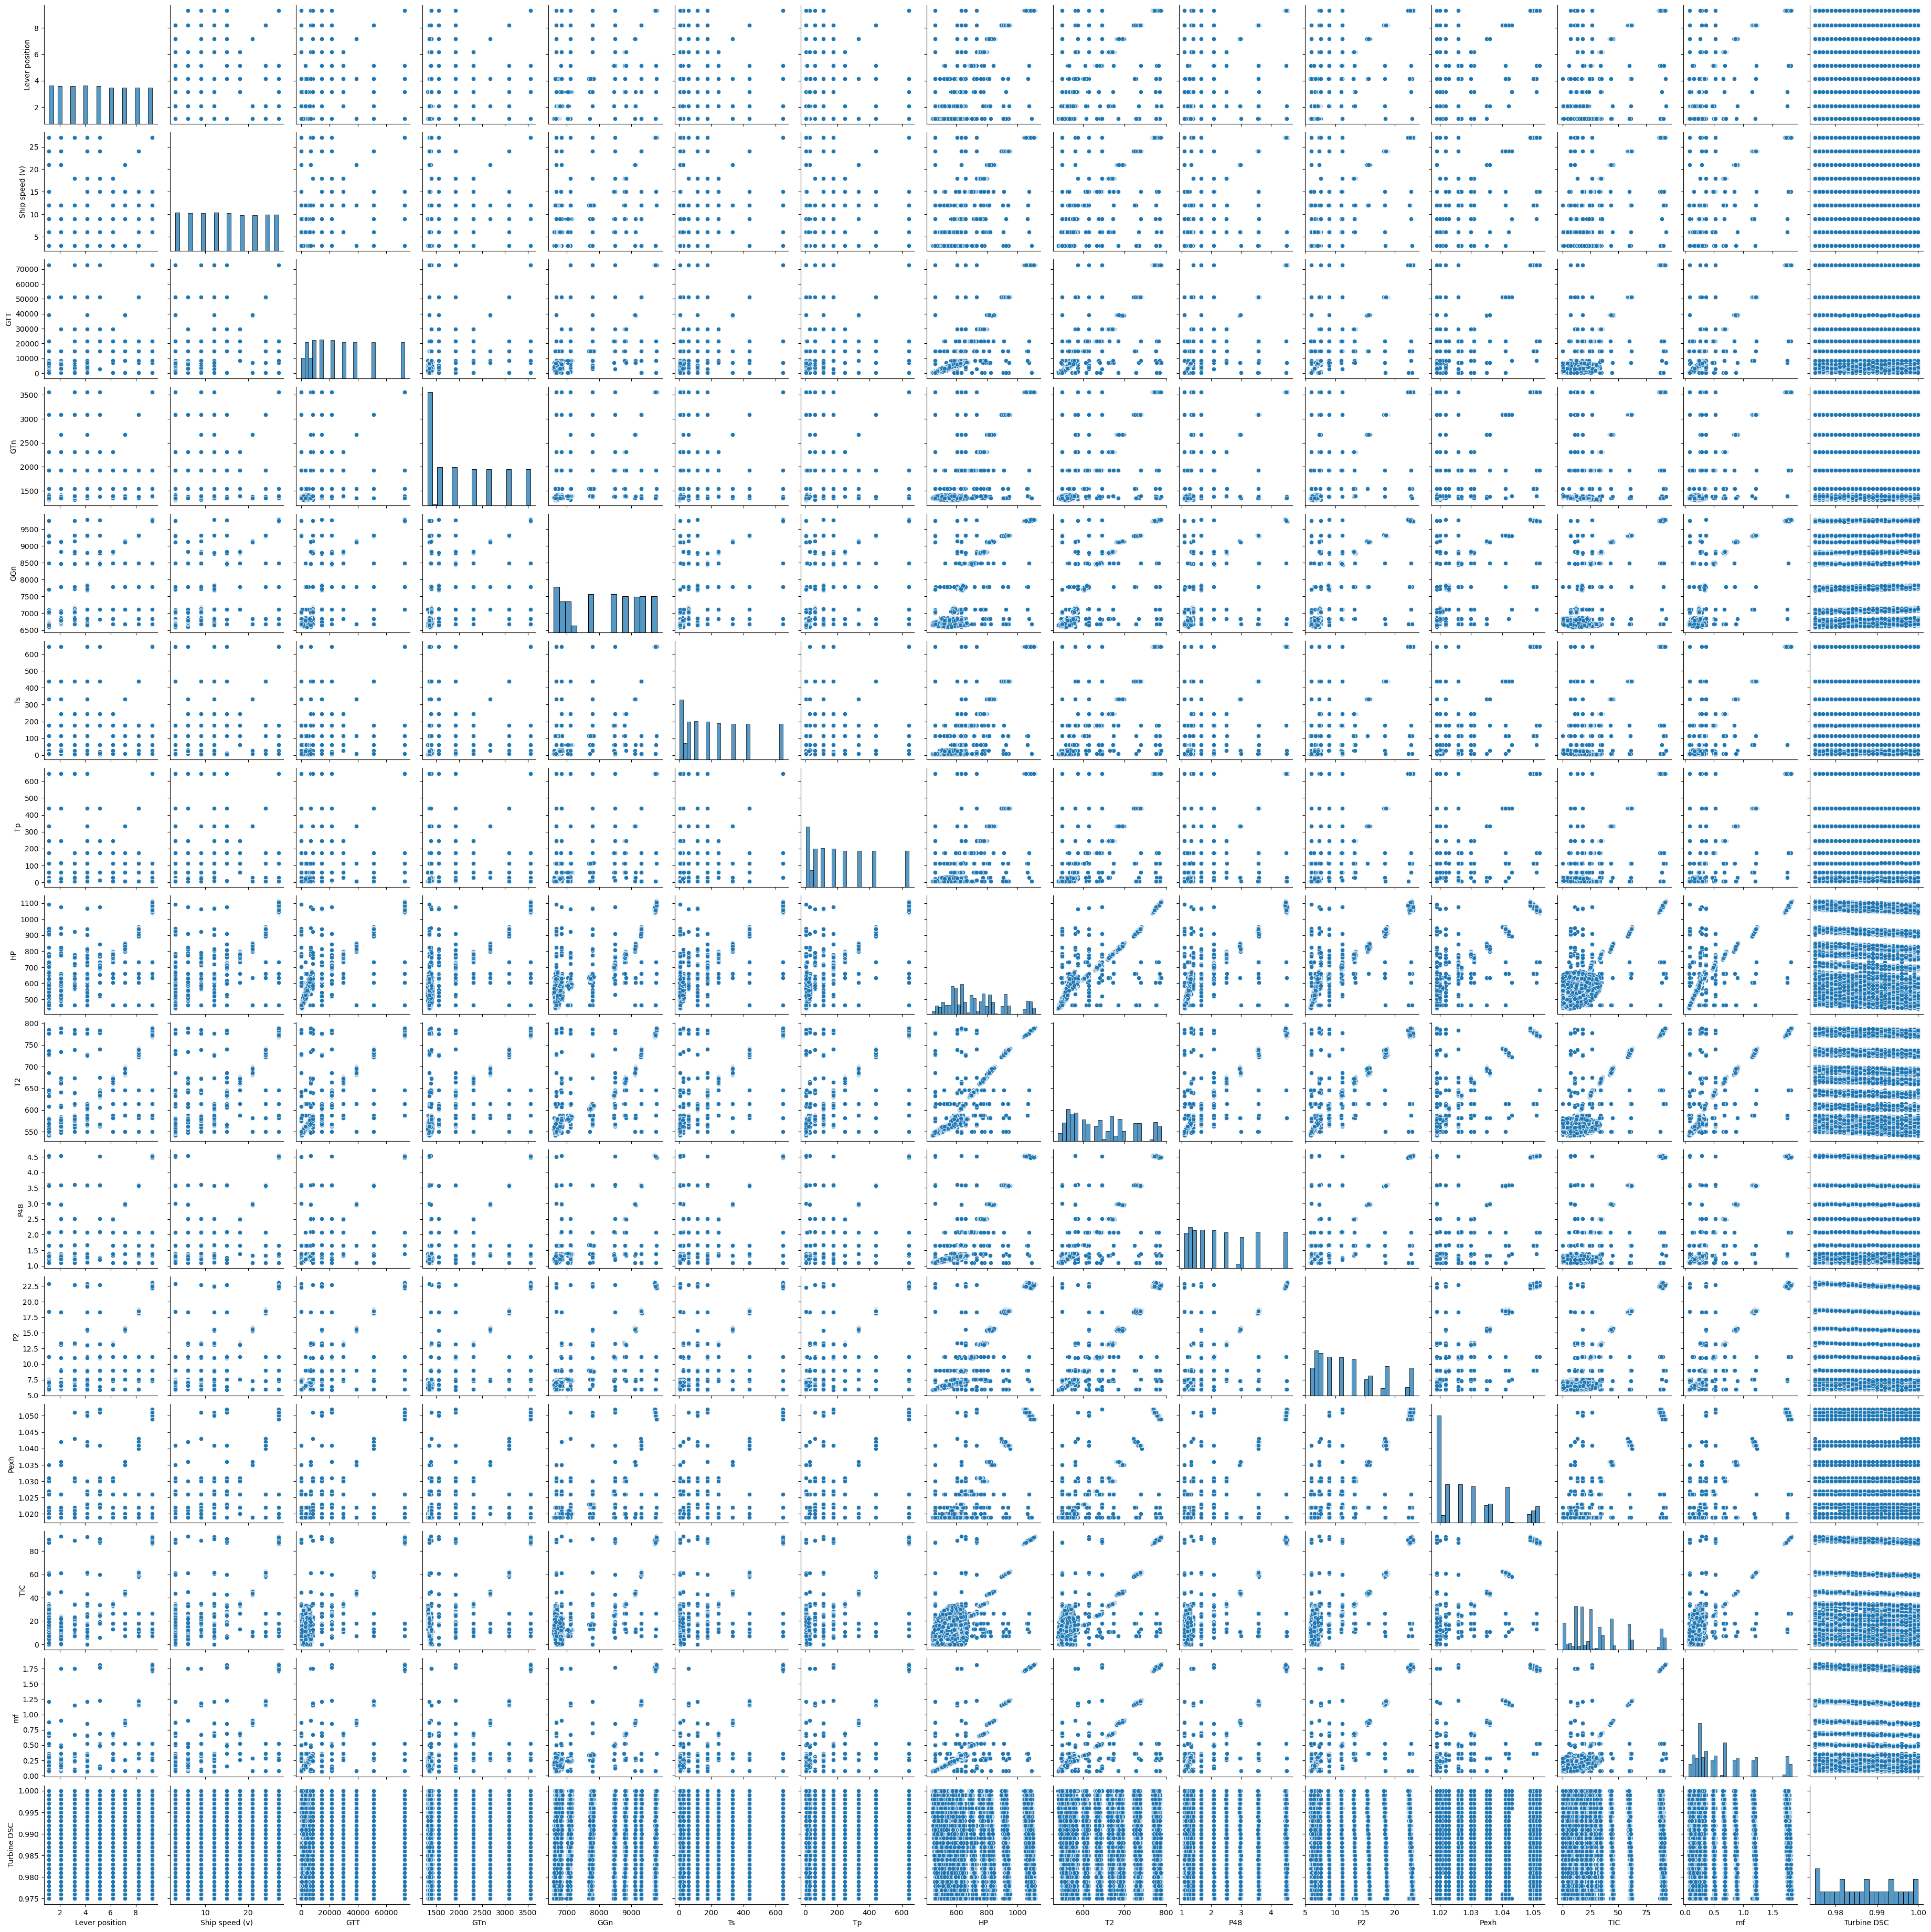

In [22]:
# Pair Plot visualization code
sns.pairplot(data2)

### 6.Data Scaling

In [23]:
# before scaling lets find the dependent variable and independent features
x = data2.drop(columns=['Turbine DSC']) # independent variables
y = data2[['Turbine DSC']]

In [24]:
print(x.shape)
print(y.shape)

(12403, 14)
(12403, 1)


In [25]:
# scaling the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#fit and transform
X = sc.fit_transform(x)

I have used StandardScaler from the scikit-learn library for scaling data. This method transforms the data such that it has a mean of 0 and a standard deviation of 1.It helps to bring all features onto a similar scale.When features have significantly different scales, it can lead to biased model training or result in features with larger scales dominating the learning process.

### 7.Data Splitting 

In [26]:
# Split your data into test and train
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2, random_state = 0)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(9922, 14) (9922, 1) (2481, 14) (2481, 1)


As dataset is huge i have choosen 80-20 ratio. By allocating 80% of the data to the training set, we will get enough data to train the model and capture patterns and relationships in the data.

## ***ML Model Implementation***

### ML Model - 1

## Linear Regression

In [27]:
# ML Model - 1 Implementation
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
# Fit the Algorithm
lr.fit(x_train,y_train)
# Predict on the model
y_train_predict=lr.predict(x_train)
y_test_predict=lr.predict(x_test)

In [28]:
#Coefficient
print('Coeffiecients: \n',lr.coef_)

Coeffiecients: 
 [[ 2.70793731e-05 -1.24811332e-04  2.82694719e-07  1.82116863e-06
   3.44672789e-06  1.42221551e-05  5.17753011e-06 -3.13421887e-05
  -5.63727939e-05  2.60302814e-03 -2.14291364e-03  7.95130681e-01
  -1.34650591e-05 -7.68327311e-03]]


In [29]:
lr.intercept_

array([0.21131593])

In [30]:
# importing libraries to check the accurary of the model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [31]:
# lets define a function of the metrics
def cal_metrics_score(y_train,y_train_pred,y_test,y_test_pred):
    # Mean Squared Error
    MSE_train=mean_squared_error(y_train,y_train_pred)
    print('MSE train score is :',MSE_train)
    MSE_test=mean_squared_error(y_test,y_test_pred)
    print('MSE test score is :',MSE_test)

    #Root mean square error
    print('RMSE train Score: ',np.sqrt(MSE_train))
    print('RMSE test Score: ',np.sqrt(MSE_test))

    #R2 score
    r2_train=r2_score(y_train,y_train_pred)
    print('r2 train score: ',r2_train)
    r2_test=r2_score(y_test,y_test_pred)
    print('r2 test score: ',r2_test)

In [32]:
# Calculating metrics
cal_metrics_score(y_train,y_train_predict,y_test,y_test_predict)

MSE train score is : 5.414008303881452e-05
MSE test score is : 5.3684804953899797e-05
RMSE train Score:  0.007357994498422414
RMSE test Score:  0.007326991534995778
r2 train score:  0.0904962150952271
r2 test score:  0.07530244355453752


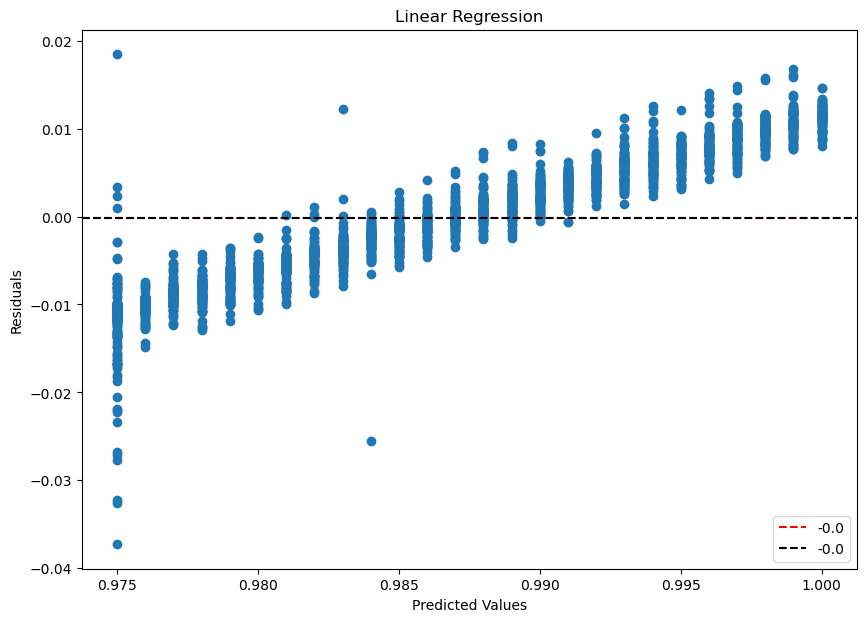

In [33]:
# Plot Residuals
residuals = y_test - y_test_predict
plt.figure(figsize = (10,7))
plt.scatter(y_test,residuals)
plt.axhline(y=np.nanmean(residuals), color='red', linestyle='--',label=round(np.mean(residuals),2)[0])
plt.axhline(y=np.nanmedian(residuals), color='black', linestyle='--',label=round(np.median(residuals),2))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Linear Regression')
plt.legend()
plt.show()

### ML Model - 2

## Decision Tree 

In [34]:
# ML Model - 2 Implementation
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(max_depth=20)
# Fit the Algorithm
dt.fit(x_train,y_train)
# Predict on the model
y_train_dt_pred=dt.predict(x_train)
y_test_dt_pred=dt.predict(x_test)

In [35]:
# Evaluate the evaluation metrics score
cal_metrics_score(y_train,y_train_dt_pred,y_test,y_test_dt_pred)

MSE train score is : 1.2872177608892037e-06
MSE test score is : 3.899207955651515e-06
RMSE train Score:  0.001134556195562478
RMSE test Score:  0.0019746412220075613
r2 train score:  0.9783759211324805
r2 test score:  0.9328378286600864


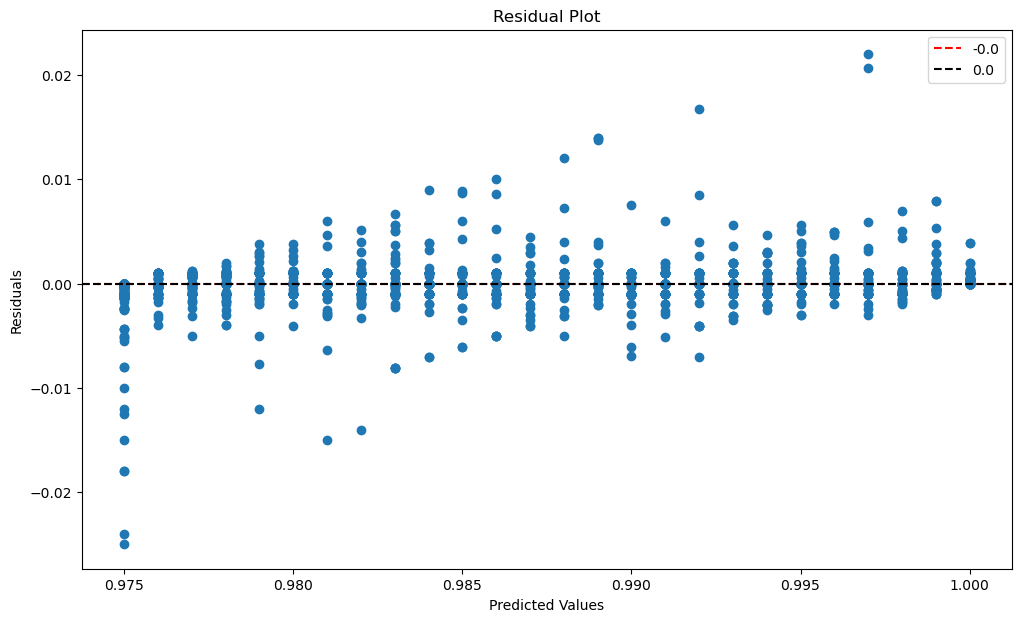

In [36]:
# Plot Residuals
y_test_dtt_pred = y_test_dt_pred.reshape(-1,1)
residuals = y_test - y_test_dtt_pred
plt.figure(figsize = (12,7))
plt.scatter(y_test,residuals)
plt.axhline(y=np.nanmean(residuals), color='red', linestyle='--',label=round(np.mean(residuals),2)[0])
plt.axhline(y=np.nanmedian(residuals), color='black', linestyle='--',label=round(np.median(residuals),2))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.legend()
plt.show()

### ML Model - 3

## Random Forest

In [37]:
# ML Model - 3 Implementation
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=50,max_depth=20)

# Fit the Algorithm
rf.fit(x_train,y_train)

# Predict on the model
y_train_rf_pred=rf.predict(x_train)
y_test_rf_pred=rf.predict(x_test)

In [38]:
# calculate evaluation Metric Score
cal_metrics_score(y_train,y_train_rf_pred,y_test,y_test_rf_pred)

MSE train score is : 8.059166666450395e-07
MSE test score is : 2.0698717671950065e-06
RMSE train Score:  0.0008977286152535406
RMSE test Score:  0.0014387048923233028
r2 train score:  0.9864613384854618
r2 test score:  0.9643473536520386


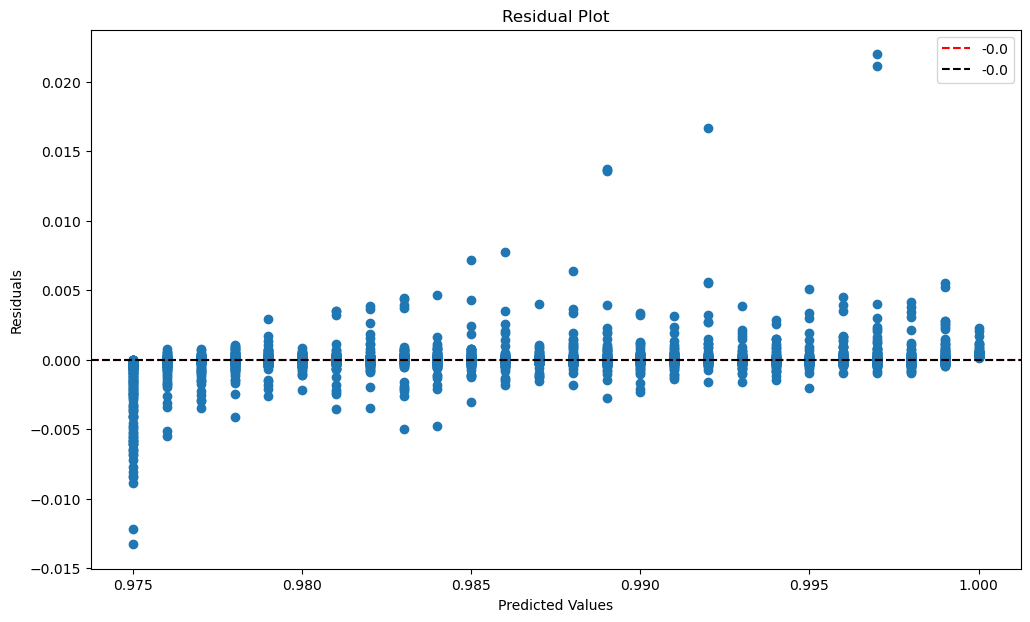

In [39]:
#plot residuals
y_test_rff_pred= y_test_rf_pred.reshape(-1,1)
residuals=y_test-y_test_rff_pred
plt.figure(figsize=(12,7))
plt.scatter(y_test,residuals)
plt.axhline(y=np.nanmean(residuals), color='red', linestyle='--',label=round(np.mean(residuals),2)[0])
plt.axhline(y=np.nanmedian(residuals), color='black', linestyle='--',label=round(np.median(residuals),2))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.legend()
plt.show()


## Feature Importance

In [41]:
feature_importances = rf.feature_importances_
print("\nFeature Importances:")
for feature, importance in zip(data2.columns[:-1], feature_importances):
    print(f"{feature}: {importance}")


Feature Importances:
Lever position: 0.003832073300676899
Ship speed (v): 0.0033617532664748377
GTT: 0.10439067681097987
GTn: 0.07808715081418388
GGn: 0.1570838082730825
Ts: 0.013732369857515763
Tp: 0.01292402226107595
HP: 0.014647752833731318
T2: 0.046760021024858635
P48: 0.017537746425485917
P2: 0.39661684968506955
Pexh: 0.07120513250413525
TIC: 0.047082663423782894
mf: 0.032737979518946816


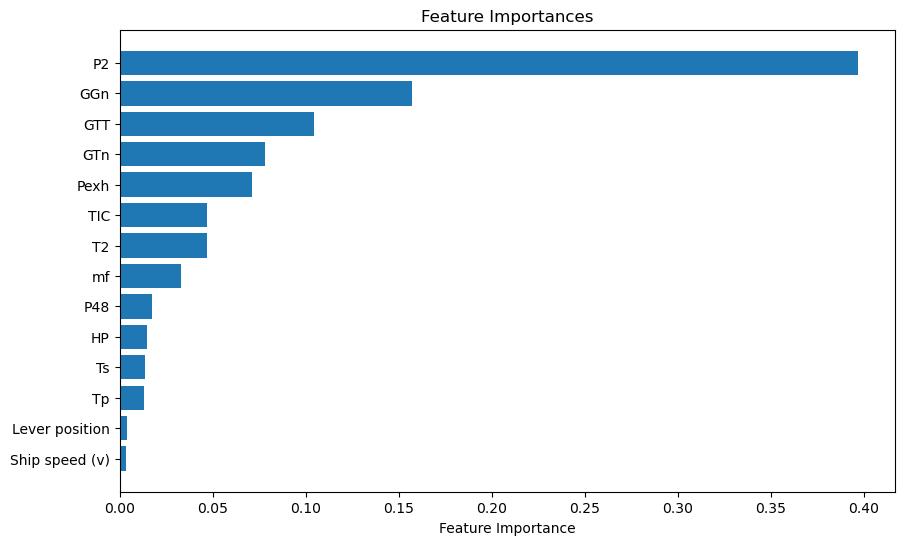

In [43]:
# Extract feature names and importances
feature_names = data2.columns[:-1]
importances = rf.feature_importances_

# Sort features by importance in descending order
sorted_indices = importances.argsort()[::-1]
sorted_features = [feature_names[i] for i in sorted_indices]
sorted_importances = importances[sorted_indices]

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_features)), sorted_importances, align='center')
plt.yticks(range(len(sorted_features)), sorted_features)
plt.xlabel('Feature Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # to display highest importance at the top
plt.show()

I have applied Feature importance method to find out what are the features that are important for the prediction of the target feature:

it was found that GT Compressor outlet air pressure (P2) [bar] is contributing the most around 0.39,followed by the Gas Generator rate of revolutions (GGn) [rpm] and then by Gas Turbine (GT) shaft torque (GTT) [kN m] and then GT rate of revolutions (GTn) [rpm], and GT exhaust gas pressure (Pexh) [bar] and so on..